# **Análisis de Series Temporales**

### Generación de Datos Aleatorios para Explicación

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Leer el archivo CSV con separador de columnas y posibles comas como separador decimal
ruta = '/content/drive/MyDrive/METODOS_Y_MODELOS/5_Quinta_Sesion/Datos_5/usaquen2022.xlsx'
df = pd.read_excel(ruta)
df.head()

,fecha,PM10,NO,NO2,NOX,VV,DV,Temperatura,Precipitacion,PM2.5,OZONO,CO,SO2,Temperatura_
0,01-01-2022 01:00,35.5,0.246,5.971,6.217,0.6,91.0,13.8,0.0,20.0,20.433,0.36235,NaN,13.8
1,01-01-2022 02:00,32.5,0.776,4.929,5.705,0.5,72.0,13.6,0.0,19.0,23.391,0.31043,NaN,13.6
2,01-01-2022 03:00,26.1,0.337,2.559,2.896,0.2,138.0,13.7,0.0,18.0,24.926,0.26675,NaN,13.7
3,01-01-2022 04:00,22.7,0.180,1.648,1.828,1.1,116.0,13.5,0.0,18.0,25.624,0.24239,NaN,13.5
4,01-01-2022 05:00,NaN,0.168,1.266,1.434,1.4,116.0,12.8,0.0,14.0,25.014,0.22858,NaN,12.8


In [44]:
df["Fecha"] = pd.date_range(start="1/1/2022 01:00", end="1/1/2023 00:00", freq="H")
df = df.set_index("Fecha")
df.head()

<ipython-input-44-69712e6c525f>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df["Fecha"] = pd.date_range(start="1/1/2022 01:00", end="1/1/2023 00:00", freq="H")


,fecha,PM10,NO,NO2,NOX,VV,DV,Temperatura,Precipitacion,PM2.5,OZONO,CO,SO2,Temperatura_
Fecha,,,,,,,,,,,,,,
2022-01-01 01:00:00,01-01-2022 01:00,35.5,0.246,5.971,6.217,0.6,91.0,13.8,0.0,20.0,20.433,0.36235,NaN,13.8
2022-01-01 02:00:00,01-01-2022 02:00,32.5,0.776,4.929,5.705,0.5,72.0,13.6,0.0,19.0,23.391,0.31043,NaN,13.6
2022-01-01 03:00:00,01-01-2022 03:00,26.1,0.337,2.559,2.896,0.2,138.0,13.7,0.0,18.0,24.926,0.26675,NaN,13.7
2022-01-01 04:00:00,01-01-2022 04:00,22.7,0.180,1.648,1.828,1.1,116.0,13.5,0.0,18.0,25.624,0.24239,NaN,13.5
2022-01-01 05:00:00,01-01-2022 05:00,NaN,0.168,1.266,1.434,1.4,116.0,12.8,0.0,14.0,25.014,0.22858,NaN,12.8


/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


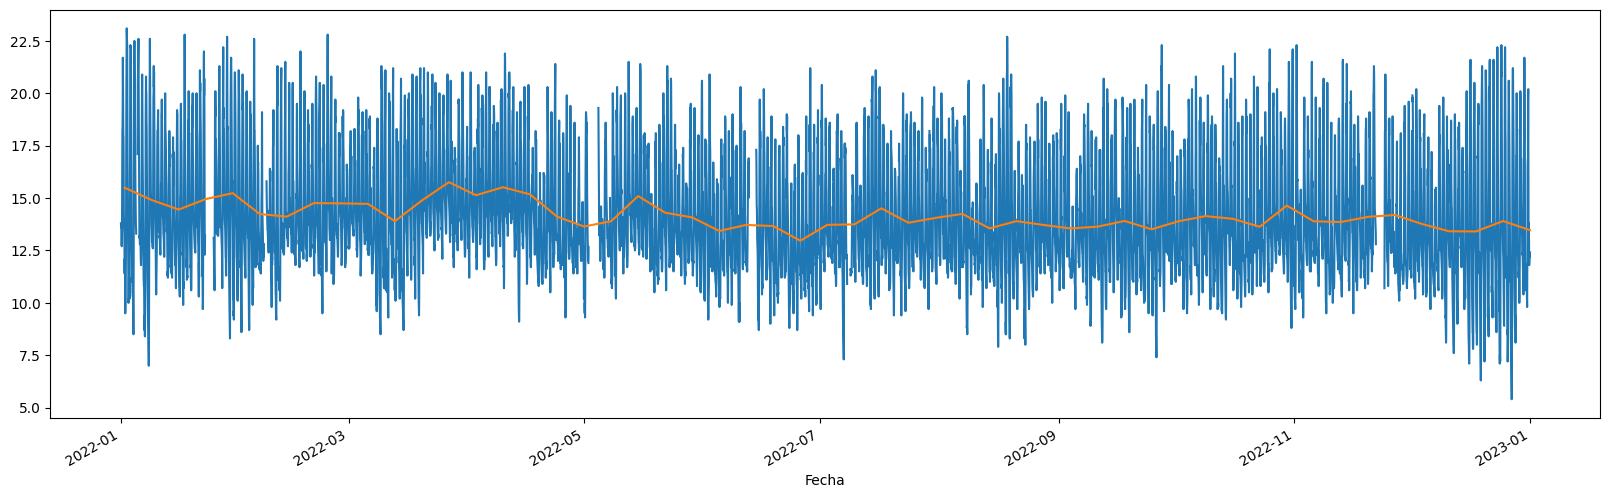

In [68]:
plt.figure(figsize=(20, 6))

plt.plot(df['Temperatura_'])
#plt.plot(df['Temperatura_'].loc["2022-05-01":"2022-05-31"])
df['Temperatura_'].resample("W").mean().plot()
#df.Temperatura.groupby(df.Temperatura.index.hour).mean().plot()

plt.show()

In [19]:

print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2022-01-01 01:00:00 to 2023-01-01 00:00:00
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fecha          8760 non-null   object 
 1   PM10           8099 non-null   float64
 2   NO             8656 non-null   float64
 3   NO2            8656 non-null   float64
 4   NOX            8656 non-null   float64
 5   VV             8741 non-null   float64
 6   DV             8748 non-null   float64
 7   Temperatura    8754 non-null   float64
 8   Precipitacion  5768 non-null   float64
 9   PM2.5          8069 non-null   float64
 10  OZONO          7781 non-null   float64
 11  CO             8643 non-null   float64
 12  SO2            1678 non-null   float64
 13  Temperatura_   8503 non-null   float64
dtypes: float64(13), object(1)
memory usage: 1.0+ MB
None


,0
fecha,0
PM10,661
NO,104
NO2,104
NOX,104
VV,19
DV,12
Temperatura,6
Precipitacion,2992
PM2.5,691


# **Completación de Datos en Series de Tiempo**

La completación de datos en series temporales es el proceso de llenar los valores faltantes (NaN) en una serie cronológica, asegurando que la información tenga una continuidad temporal adecuada.

Esto es clave para poder aplicar modelos estadísticos o de aprendizaje automático, ya que muchos de ellos no toleran valores nulos.

### ¿Por qué ocurren los datos faltantes?
- Fallos en sensores (por ejemplo, estaciones meteorológicas).
- Problemas en el almacenamiento o transmisión de datos.
- Recolección irregular o manual.
- Conversión de frecuencia (por ejemplo, de datos diarios a horarios).

## **Métodos comunes de completación**

<ipython-input-47-a185155eae97>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Temperatura_1'] = df['Temperatura_'].fillna(method='ffill')


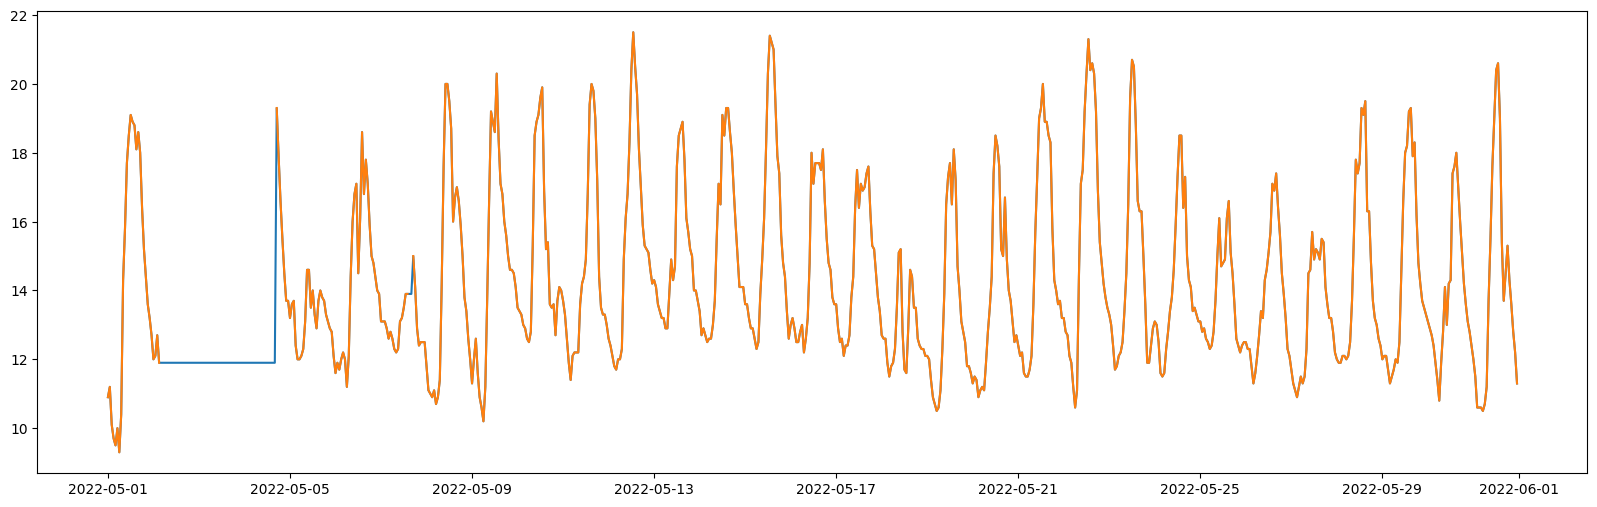

In [47]:
# 2. Forward Fill (último valor válido)
df['Temperatura_1'] = df['Temperatura_'].fillna(method='ffill')

plt.figure(figsize=(20, 6))
plt.plot(df['Temperatura_1'].loc["2022-05-01":"2022-05-31"])
plt.plot(df['Temperatura_'].loc["2022-05-01":"2022-05-31"])
#plt.plot(df['Temperatura_'])
plt.show()

In [50]:
# 3. Backward Fill (siguiente valor válido)
df['Temperatura_'].fillna(method='bfill')

<ipython-input-50-971723b66d9f>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Temperatura_'].fillna(method='bfill')


,Temperatura_
Fecha,
2022-01-01 01:00:00,13.8
2022-01-01 02:00:00,13.6
2022-01-01 03:00:00,13.7
2022-01-01 04:00:00,13.5
2022-01-01 05:00:00,12.8
...,...
2022-12-31 20:00:00,12.0
2022-12-31 21:00:00,12.3
2022-12-31 22:00:00,12.2


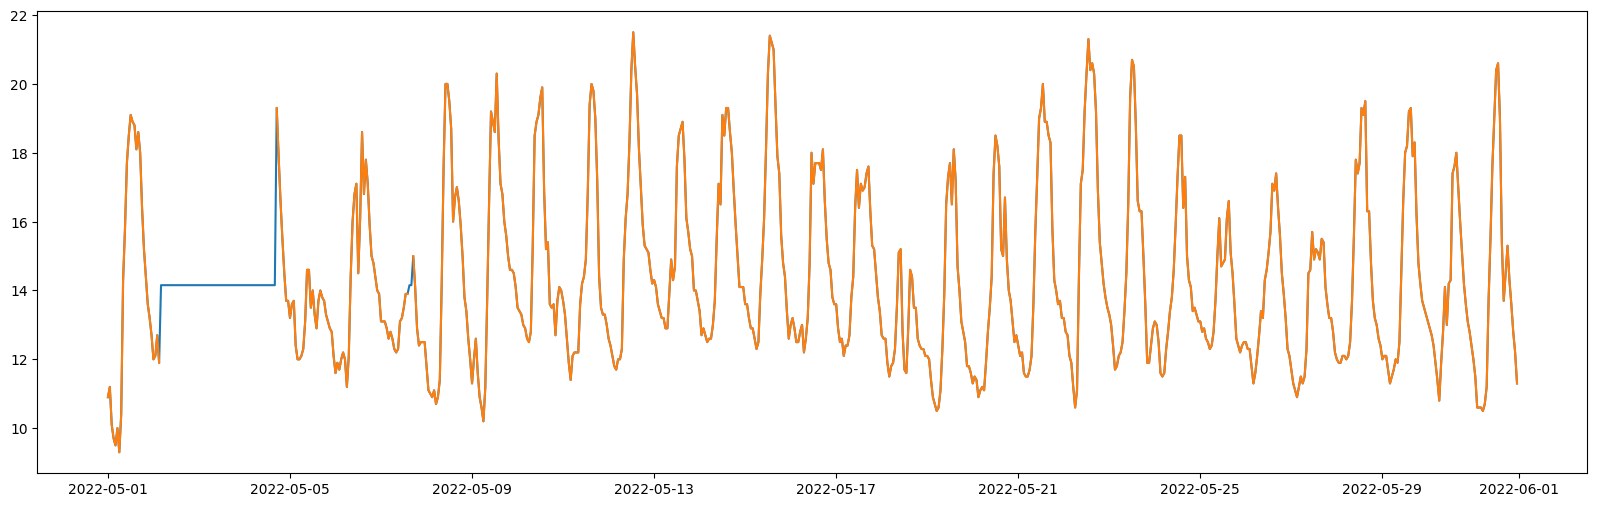

In [52]:
# 4. Media o mediana
df['Temperatura_'].fillna(df['variable'].mean())


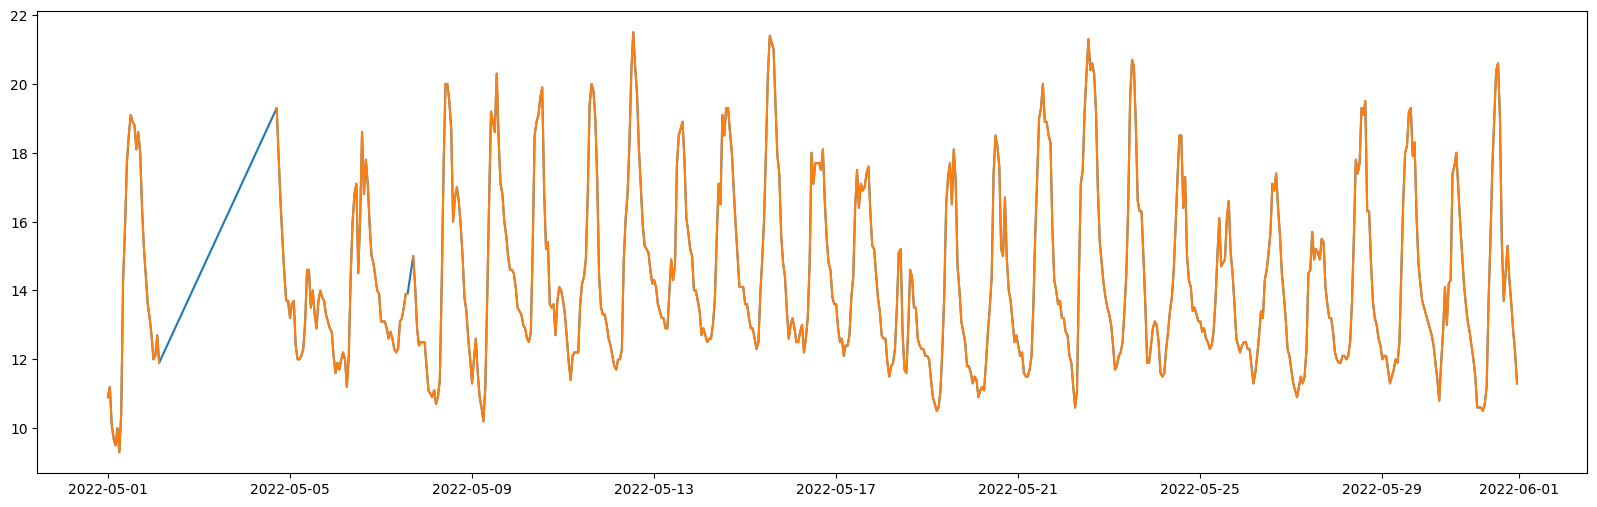

In [53]:
# 1. Interpolación lineal
df['Temperatura_'].interpolate(method='linear')

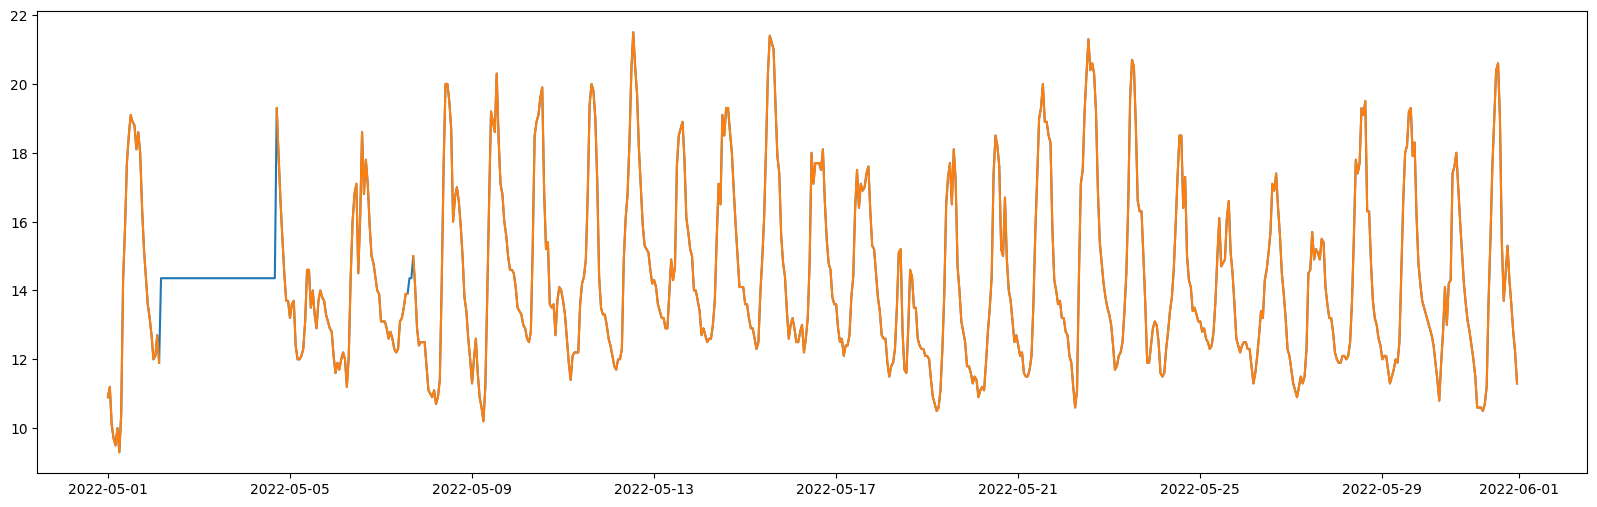

In [54]:
# 5. Interpolación estacional (por mes)
df['Temperatura_1'] = df.groupby(df.index.month)['Temperatura_'].transform(lambda x: x.fillna(x.mean()))

plt.figure(figsize=(20, 6))
plt.plot(df['Temperatura_1'].loc["2022-05-01":"2022-05-31"])
plt.plot(df['Temperatura_'].loc["2022-05-01":"2022-05-31"])
#plt.plot(df['Temperatura_'])
plt.show()

# **Descomposición de Series de Tiempo con Python**

```
seasonal_decompose(df['Temperatura'], model='additive', period=8760)
```

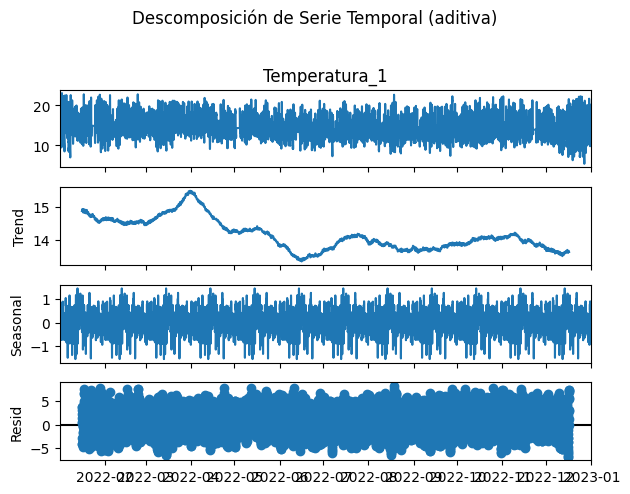

In [63]:
# Descoponer la serie
resultado = seasonal_decompose(df['Temperatura_1'], model='additive', period=730)

# Graficar componentes: tendencia, estacionalidad y residuo
resultado.plot()
plt.suptitle("Descomposición de Serie Temporal (aditiva)", y=1.02)
plt.tight_layout()
plt.show()